In [363]:
import pandas as pd
import numpy as np

In [364]:
import matplotlib.pyplot as plt

In [365]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [366]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge

In [367]:
x,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1,noise=40,random_state=13)

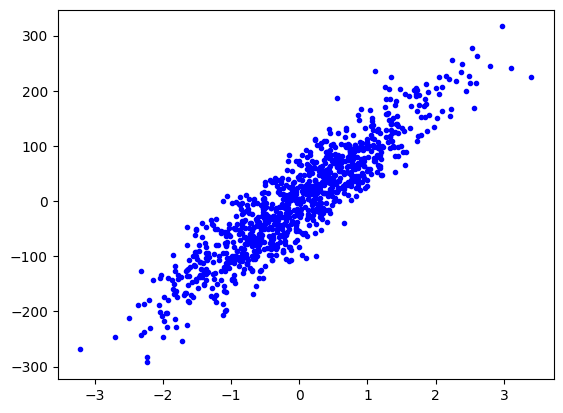

In [368]:
plt.plot(x, y, 'b.')

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42 )

In [370]:
model = LinearRegression()

In [371]:
model.fit(x_train, y_train)

LinearRegression()

In [372]:
model.coef_

array([89.74950572])

In [373]:
model.intercept_

2.226902857358668

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.502e+05, tolerance: 7.449e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

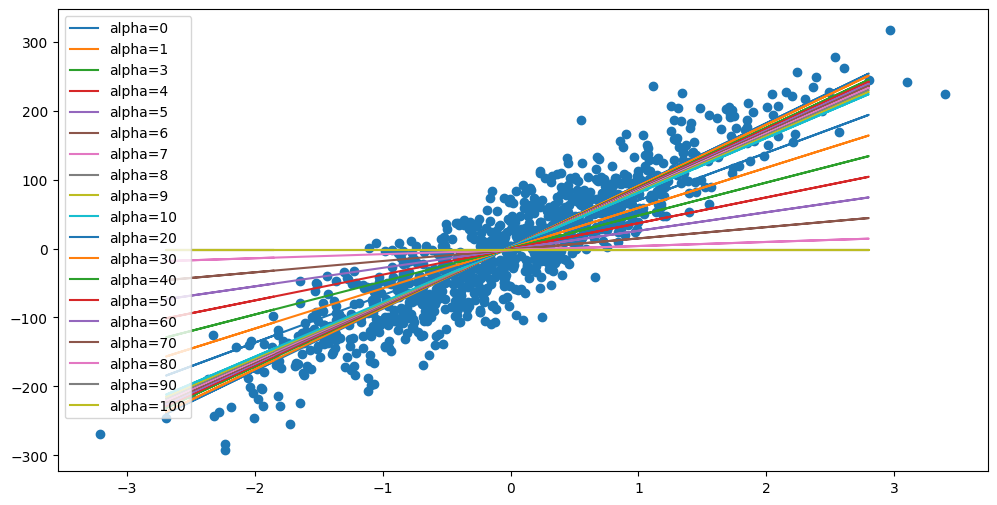

In [374]:
alphas = [0,1,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

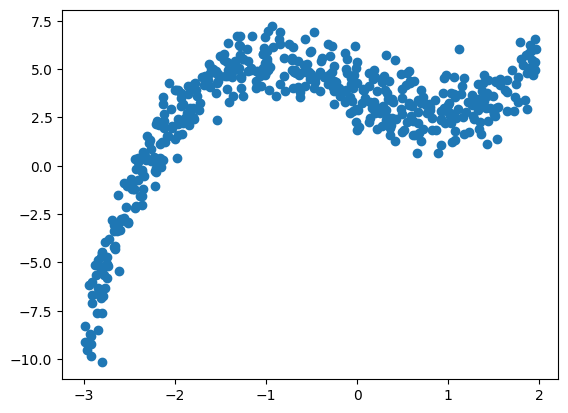

In [375]:
m = 500
x1 = 5 * np.random.rand(m, 1) - 3
x2 = 0.7 * x1 ** 3 - 2 * x1 + 4 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [376]:
x_train, x_test, y_train, y_test = train_test_split(x1 , x2, test_size=0.2, random_state=42 )

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+03, tolerance: 4.746e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

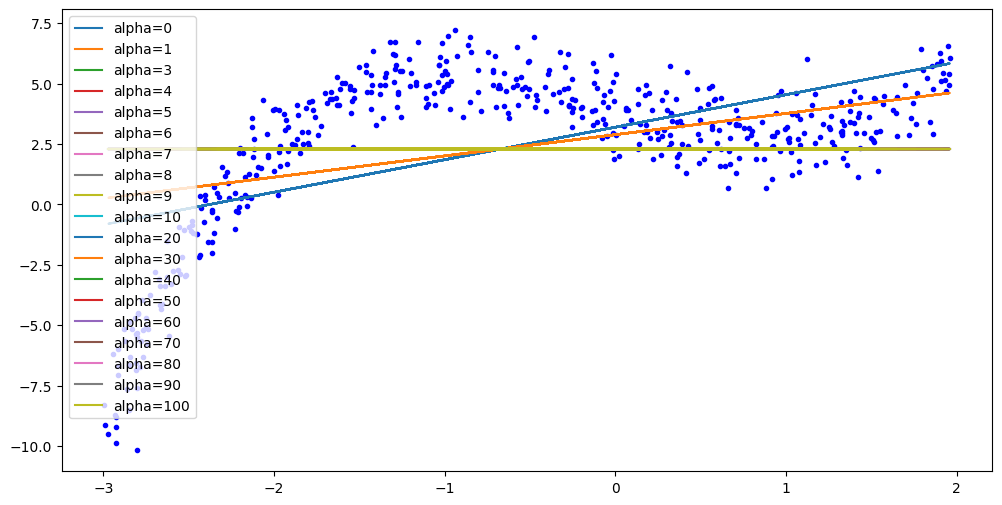

In [377]:
alphas = [0,1,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

plt.figure(figsize=(12,6))
plt.plot(x1, x2, 'b.')
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+02, tolerance: 5.705e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

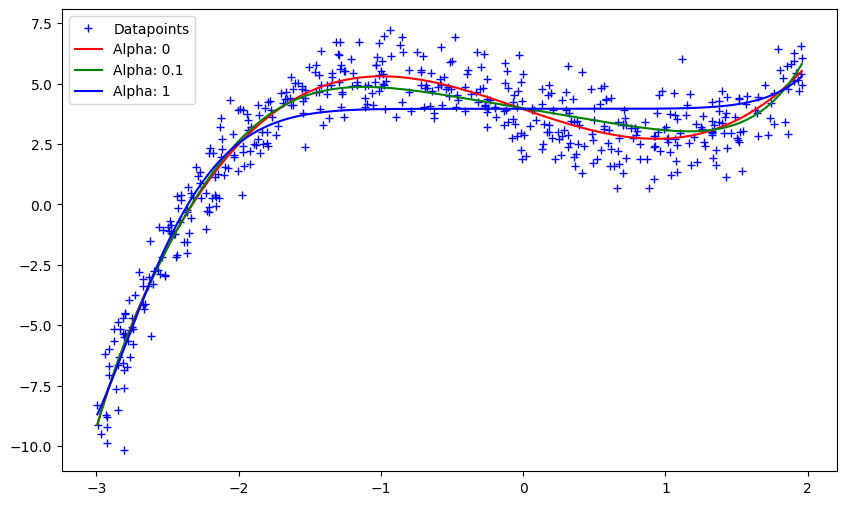

In [378]:
def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1, 1,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+02, tolerance: 4.746e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

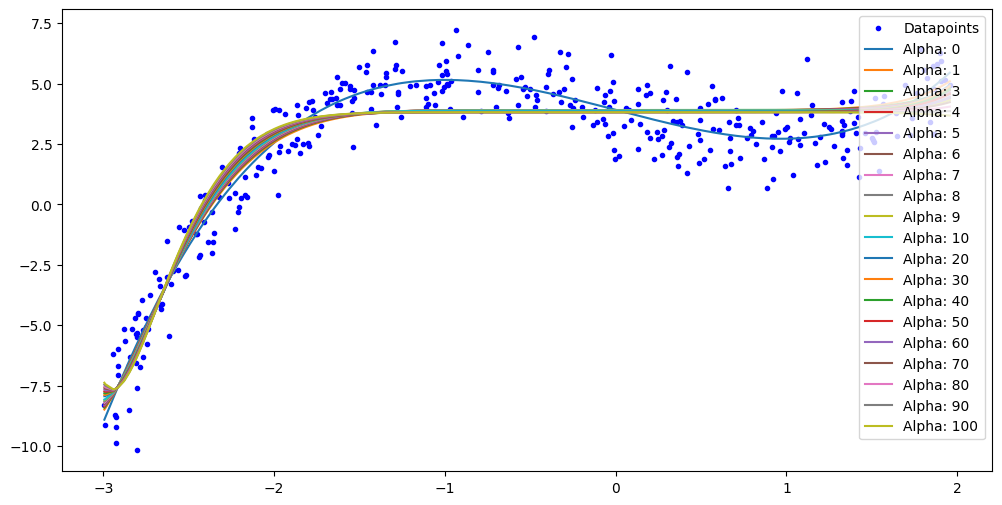

In [379]:
def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(12, 6))
plt.plot(x_train, y_train, 'b.', label='Datapoints')

for alpha in alphas:
    preds = get_preds_lasso(x_train, y_train, alpha)
    plt.plot(sorted(x_train[:, 0]), preds[np.argsort(x_train[:, 0])], label=f'Alpha: {alpha}')

plt.legend()
plt.show()